# Background removal filters
There are also background removal filters. If there is a more or less homogeneous intensity spread over the whole image, potentially increasing in a direction, it is recommended to remove this background before segmenting the image.

In [1]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
from skimage.filters import gaussian
from skimage.restoration import rolling_ball 
from skimage.morphology import disk
import matplotlib.pyplot as plt
from skimage.filters import difference_of_gaussians
from skimage.morphology import white_tophat

As example image, we will work with a zebrafish eye data set (Courtesy of Mauricio Rocha Martins, Norden lab, MPI CBG). As you can see, there is some intensity spread around the nuclei we want to segment later on. The source of this background signal is out-of-focus light.

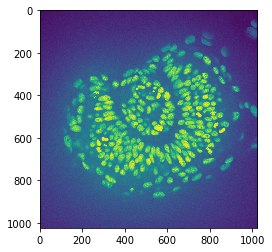

In [2]:
# load zfish image and extract a channel
zfish_image = imread('../../data/zfish_eye.tif')[:,:,0]

imshow(zfish_image)

To subtract the background, we need to determine it first. We can use the [rolling-ball algorithm](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_rolling_ball.html) for that. The radius parameter configures how distant pixels should be taken into account for determining the background intensity.

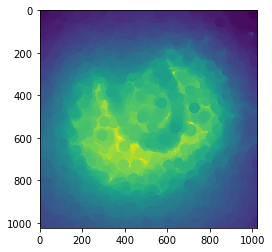

In [3]:
background_rolling = rolling_ball(zfish_image, radius=25)

imshow(background_rolling)

Afterwards, we subtract the background from the original and display all three images:

Text(0.5, 1.0, 'Background subtracted')

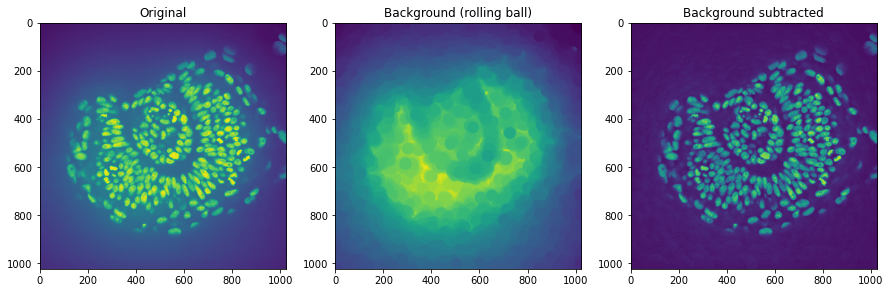

In [4]:
zfish_rolling = zfish_image - background_rolling

fig, axs = plt.subplots(1, 3, figsize=(15,10))

# first row
axs[0].imshow(zfish_image)
axs[0].set_title("Original")
axs[1].imshow(background_rolling)
axs[1].set_title("Background (rolling ball)")
axs[2].imshow(zfish_rolling)
axs[2].set_title("Background subtracted")

We could do the same using a Gaussian blur filter.

Text(0.5, 1.0, 'Background subtracted')

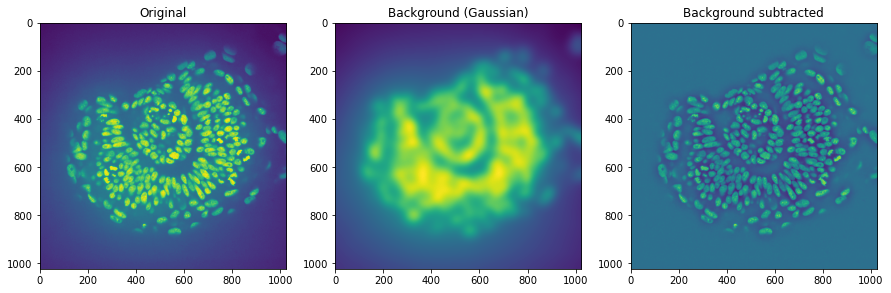

In [5]:
background_gaussian = gaussian(zfish_image, sigma=20, preserve_range=True)

zfish_gaussian = zfish_image - background_gaussian

fig, axs = plt.subplots(1, 3, figsize=(15,10))

# first row
axs[0].imshow(zfish_image)
axs[0].set_title("Original")
axs[1].imshow(background_gaussian)
axs[1].set_title("Background (Gaussian)")
axs[2].imshow(zfish_gaussian)
axs[2].set_title("Background subtracted")

In some scenarios it also makes sense to divide the image by the background. This helps for example to make all nuclei in this image have similar intensities. This could be advantageous for nuclei segmentation.

Text(0.5, 1.0, 'Background divided')

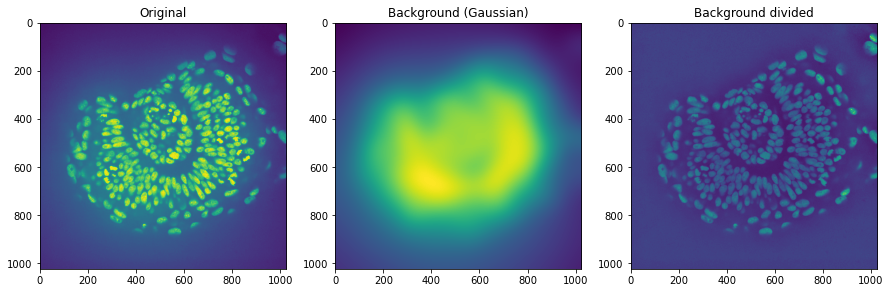

In [6]:
background_gaussian = gaussian(zfish_image, sigma=50, preserve_range=True)

zfish_gaussian = zfish_image / background_gaussian

fig, axs = plt.subplots(1, 3, figsize=(15,10))

# first row
axs[0].imshow(zfish_image)
axs[0].set_title("Original")
axs[1].imshow(background_gaussian)
axs[1].set_title("Background (Gaussian)")
axs[2].imshow(zfish_gaussian)
axs[2].set_title("Background divided")

## Other background subtraction techniques
There are other techniques for background subtraction such as the [top-hat](https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html#white-tophat). Furthwermore, the [Difference of Gaussians (DoG)](https://scikit-image.org/docs/stable/auto_examples/filters/plot_dog.html) is a technique for combined denoising and background removal.

Text(0.5, 1.0, 'Rolling ball algorithm')

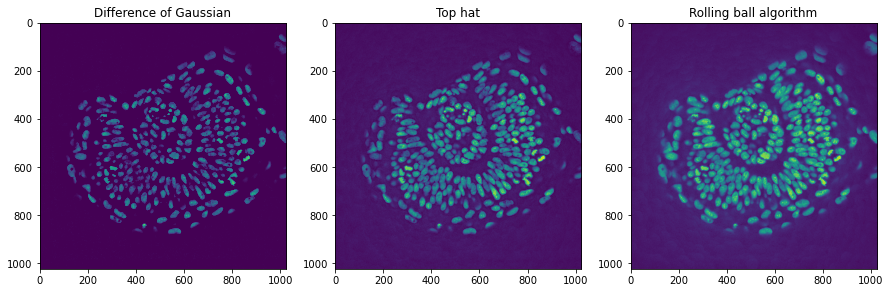

In [7]:
# DoG

zfish_dog = difference_of_gaussians(zfish_image, 0, 15)

# Top-Hat
zfish_top_hat = white_tophat(zfish_image, disk(15))

fig, axs = plt.subplots(1, 3, figsize=(15,10))

# first row
axs[0].imshow(zfish_dog, vmin=0)
axs[0].set_title("Difference of Gaussian")
axs[1].imshow(zfish_top_hat)
axs[1].set_title("Top hat")
axs[2].imshow(zfish_rolling)
axs[2].set_title("Rolling ball algorithm")

## Exercise
Apply different algorithms and radii to remove the background in the zebrafish eye dataset. Zoom into the dataset using cropping and figure out how to make the background go away optimally.